In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
path = r'YoutubeData/' # use your path
allFiles = glob.glob(path + "/*.csv")

frame = pd.DataFrame()

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [3]:
frame.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [4]:
frame['Index'] = range(0, len(frame))
frame = frame.set_index('Index')
New = frame.copy()
New = New.iloc[np.random.permutation(len(New))]
New = New.reset_index()
del New['Index']

In [5]:
New.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,_2viQ_Qnc69vjtRxop92H6OWpxKYZu4Mokxff2OzDKE,TheBoss,2013-09-06T23:42:08.961000,This Song will never get old,0
1,_2viQ_Qnc68mfmp-D4hvnrhJa3Z4I1G4FbP0hvk2rA4,5000palo,2013-09-07T13:36:28.059000,Shakira :-*,0
2,LneaDw26bFvAsBvYZLuVc3cJCI65rJQ9A-wZAcukfp0,101Tele,NaN,yo I know nobody will probably even read this....,1
3,z12cvnpwzrmncblfm230ejjwpzvetrgl5,ROBLOX Gaming,2015-05-16T01:54:31.334000,:3﻿,0
4,z12gvlyixpjfwrpme23rxfubjvzkvp42s,Toan732,2014-10-31T02:49:34.017000,Ummm... I just hit 1k subscribers. I make Mine...,1


### The above is a dataframe of shuffled tuples from all five channels on YouTube.

### To save the last 300 tuples for a test set :

In [6]:
Training_Set = pd.DataFrame(New[0:1656])  # Required slice to calculate conditional probabilities
Test_Set = pd.DataFrame(New[1656:])

### Required Functions

Search for a particular feature (string) in comments

In [7]:
def feature_search( my_string) :
    word = Training_Set['CONTENT'].apply(lambda x: my_string in x.lower())           # Boolean series
    return word

Conditional probabilities:

In [8]:
def conditional_probabilities( s1, s2, my_string) :              # s1 = word ( a series)
    l = len(Training_Set)
    
    seri = (s1 == True) & (s2 == True) 
    iC_iSP = sum(seri)/l
   
    seri = (s1 == True) & (s2 == False) 
    iC_nSP = sum(seri)/l
    
    seri = (s1 == False) & (s2 == True) 
    nC_iSP = sum(seri)/l

    seri = (s1 == False) & (s2 == False) 
    nC_nSP = sum(seri)/l
    
    # display probability table
    
    d = {'is_%s' %my_string : [iC_iSP, iC_nSP], 'not_%s' %my_string : [nC_iSP, nC_nSP]}
    df = pd.DataFrame(d)
    df['~'] = ['is_spam', 'not_spam']
    df = df.set_index('~')
    print(df)
    
    return iC_iSP, iC_nSP, nC_iSP, nC_nSP

In [9]:
spam = Training_Set.CLASS.apply(lambda x : x == 1)                                   # Boolean series

### A bernoulli distrubution for a comment containing feature word 'channel' classified as spam

In [10]:
Bool = feature_search( 'channel' )

In [11]:
iC_iSP, iC_nSP, nC_iSP, nC_nSP = conditional_probabilities(Bool, spam, 'channel')

          is_channel  not_channel
~                                
is_spam     0.092391     0.422705
not_spam    0.001208     0.483696


In [12]:
#iC_iSP + iC_nSP + nC_iSP + nC_nSP

In [13]:
x = [0, 1]
y = [1 - iC_iSP, iC_iSP]

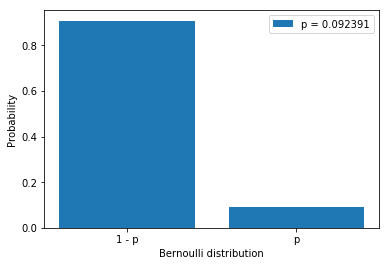

In [14]:
plt.bar(x, y)
plt.xticks(np.arange(2))
plt.xlabel('Bernoulli distribution')
plt.ylabel('Probability')
plt.subplot().set_xticklabels(('1 - p', 'p'))
plt.legend(['p = %f' %iC_iSP])

### A bernoulli distrubution for a comment containing feature word 'check'

In [15]:
Bool = feature_search( 'check' )

In [16]:
iC_iSP, iC_nSP, nC_iSP, nC_nSP = conditional_probabilities(Bool, spam, 'check')

          is_check  not_check
~                            
is_spam   0.236111   0.278986
not_spam  0.009662   0.475242


In [17]:
#iC_iSP + iC_nSP + nC_iSP + nC_nSP

In [18]:
x = [0, 1]
y = [1 - iC_iSP, iC_iSP]

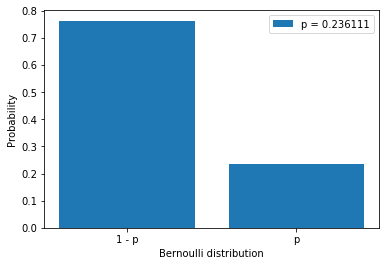

In [19]:
plt.bar(x, y)
plt.xticks(np.arange(2))
plt.xlabel('Bernoulli distribution')
plt.ylabel('Probability')
plt.subplot().set_xticklabels(('1 - p', 'p'))
plt.legend(['p = %f' %iC_iSP])

### A bernoulli distrubution for a comment containing feature word 'click'

In [20]:
Bool = feature_search( 'click' )

In [21]:
iC_iSP, iC_nSP, nC_iSP, nC_nSP = conditional_probabilities(Bool, spam, 'click')

          is_click  not_click
~                            
is_spam   0.011473   0.503623
not_spam  0.000604   0.484300


In [22]:
#iC_iSP + iC_nSP + nC_iSP + nC_nSP

In [23]:
x = [0, 1]
y = [1 - iC_iSP, iC_iSP]

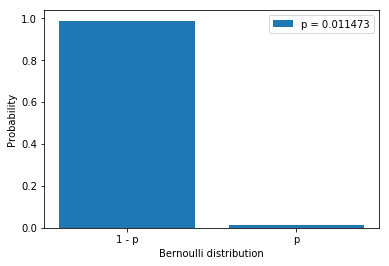

In [24]:
plt.bar(x, y)
plt.xticks(np.arange(2))
plt.xlabel('Bernoulli distribution')
plt.ylabel('Probability')
plt.subplot().set_xticklabels(('1 - p', 'p'))
plt.legend(['p = %f' %iC_iSP])

### A bernoulli distrubution for a comment containing feature URL (%.com)

To check for websotes in comments

In [25]:
Bool = feature_search( '.com' )

In [26]:
iC_iSP, iC_nSP, nC_iSP, nC_nSP = conditional_probabilities(Bool, spam, '.com')

           is_.com  not_.com
~                           
is_spam   0.096618  0.418478
not_spam  0.002415  0.482488


In [27]:
#iC_iSP + iC_nSP + nC_iSP + nC_nSP

In [28]:
x = [0, 1]
y = [1 - iC_iSP, iC_iSP]

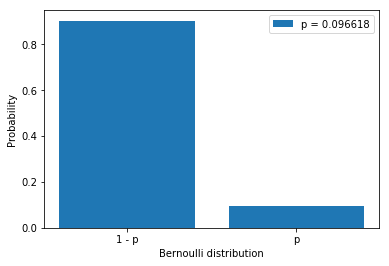

In [29]:
plt.bar(x, y)
plt.xticks(np.arange(2))
plt.xlabel('Bernoulli distribution')
plt.ylabel('Probability')
plt.subplot().set_xticklabels(('1 - p', 'p'))
plt.legend(['p = %f' %iC_iSP])

# etc.